In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

## Select a real-world dataset

In [2]:
import opendatasets as od

In [3]:
dataset_url = 'https://www.kaggle.com/datasets/mcdonalds/nutrition-facts/code?fbclid=IwAR2eLowWKvyyX2NF4bF8ZxymuBu-3l03bZYCo4YeVGW0yBVH7EXfrZIT5j0'

In [4]:
od.download(dataset_url)

Skipping, found downloaded files in ".\nutrition-facts" (use force=True to force download)


In [5]:
data_dir = './nutrition-facts'

In [6]:
import os
os.listdir(data_dir)

['menu.csv']

## Perform data preparation & cleaning

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv('nutrition-facts\menu.csv')

In [9]:
df.head(5)

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
0,Breakfast,Egg McMuffin,4.8 oz (136 g),300,120,13.0,20,5.0,25,0.0,...,31,10,4,17,3,17,10,0,25,15
1,Breakfast,Egg White Delight,4.8 oz (135 g),250,70,8.0,12,3.0,15,0.0,...,30,10,4,17,3,18,6,0,25,8
2,Breakfast,Sausage McMuffin,3.9 oz (111 g),370,200,23.0,35,8.0,42,0.0,...,29,10,4,17,2,14,8,0,25,10
3,Breakfast,Sausage McMuffin with Egg,5.7 oz (161 g),450,250,28.0,43,10.0,52,0.0,...,30,10,4,17,2,21,15,0,30,15
4,Breakfast,Sausage McMuffin with Egg Whites,5.7 oz (161 g),400,210,23.0,35,8.0,42,0.0,...,30,10,4,17,2,21,6,0,25,10


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Category                       260 non-null    object 
 1   Item                           260 non-null    object 
 2   Serving Size                   260 non-null    object 
 3   Calories                       260 non-null    int64  
 4   Calories from Fat              260 non-null    int64  
 5   Total Fat                      260 non-null    float64
 6   Total Fat (% Daily Value)      260 non-null    int64  
 7   Saturated Fat                  260 non-null    float64
 8   Saturated Fat (% Daily Value)  260 non-null    int64  
 9   Trans Fat                      260 non-null    float64
 10  Cholesterol                    260 non-null    int64  
 11  Cholesterol (% Daily Value)    260 non-null    int64  
 12  Sodium                         260 non-null    int

In [11]:
df.describe()

,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,Cholesterol,Cholesterol (% Daily Value),Sodium,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
count,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,...,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000,260.000000
mean,368.269231,127.096154,14.165385,21.815385,6.007692,29.965385,0.203846,54.942308,18.392308,495.750000,...,47.346154,15.780769,1.630769,6.530769,29.423077,13.338462,13.426923,8.534615,20.973077,7.734615
std,240.269886,127.875914,14.205998,21.885199,5.321873,26.639209,0.429133,87.269257,29.091653,577.026323,...,28.252232,9.419544,1.567717,6.307057,28.679797,11.426146,24.366381,26.345542,17.019953,8.723263
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,210.000000,20.000000,2.375000,3.750000,1.000000,4.750000,0.000000,5.000000,2.000000,107.500000,...,30.000000,10.000000,0.000000,0.000000,5.750000,4.000000,2.000000,0.000000,6.000000,0.000000
50%,340.000000,100.000000,11.000000,17.000000,5.000000,24.000000,0.000000,35.000000,11.000000,190.000000,...,44.000000,15.000000,1.000000,5.000000,17.500000,12.000000,8.000000,0.000000,20.000000,4.000000
75%,500.000000,200.000000,22.250000,35.000000,10.000000,48.000000,0.000000,65.000000,21.250000,865.000000,...,60.000000,20.000000,3.000000,10.000000,48.000000,19.000000,15.000000,4.000000,30.000000,15.000000
max,1880.000000,1060.000000,118.000000,182.000000,20.000000,102.000000,2.500000,575.000000,192.000000,3600.000000,...,141.000000,47.000000,7.000000,28.000000,128.000000,87.000000,170.000000,240.000000,70.000000,40.000000


In [12]:
## Check quality of data
df.isnull().sum()

Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64

## Perform exploratory analysis & visualization

In [13]:
counts = df.Category.value_counts()

In [14]:
counts

Coffee & Tea          95
Breakfast             42
Smoothies & Shakes    28
Chicken & Fish        27
Beverages             27
Beef & Pork           15
Snacks & Sides        13
Desserts               7
Salads                 6
Name: Category, dtype: int64

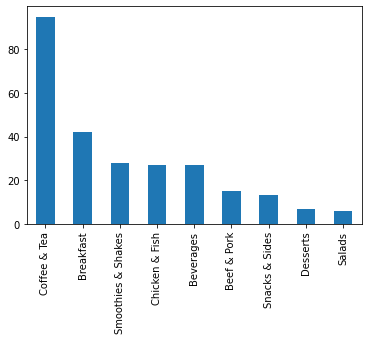

In [15]:
#use bar chart 
counts.plot(kind='bar');

 * Coffee & Tea Category has highest items
 * Salads Category has least items.



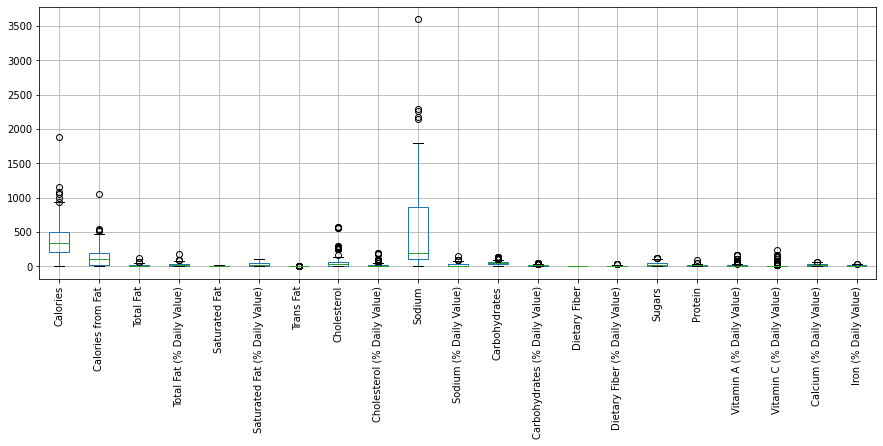

In [16]:
df.boxplot(figsize=(15,5));
plt.xticks(rotation=90);

*  All the columns except Saturated Fat, Dietary Fiber, Saturated Fat % have outliers.

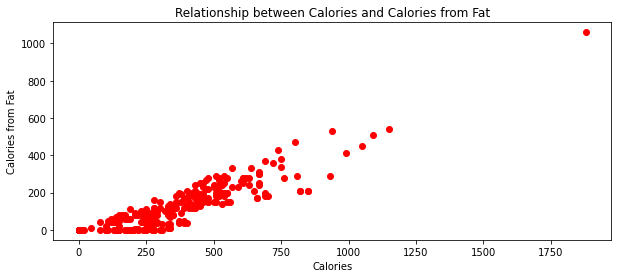

In [17]:
plt.figure(figsize=(10,4))
plt.scatter(df['Calories'],df['Calories from Fat'],c='red')
plt.title('Relationship between Calories and Calories from Fat')
plt.xlabel('Calories')
plt.ylabel('Calories from Fat');

* There is strong relationship between Calories and Calories with fat. Thus, food items with high caloric content tend to also have a high calories with fat content

## Ask & answer questions about the data

### 1. How many calories does the average McDonald's value meal contain?

In [18]:
data1 = df['Calories'].groupby(df['Category']).mean().reset_index()
data1

,Category,Calories
0,Beef & Pork,494.000000
1,Beverages,113.703704
2,Breakfast,526.666667
3,Chicken & Fish,552.962963
4,Coffee & Tea,283.894737
5,Desserts,222.142857
6,Salads,270.000000
7,Smoothies & Shakes,531.428571
8,Snacks & Sides,245.769231


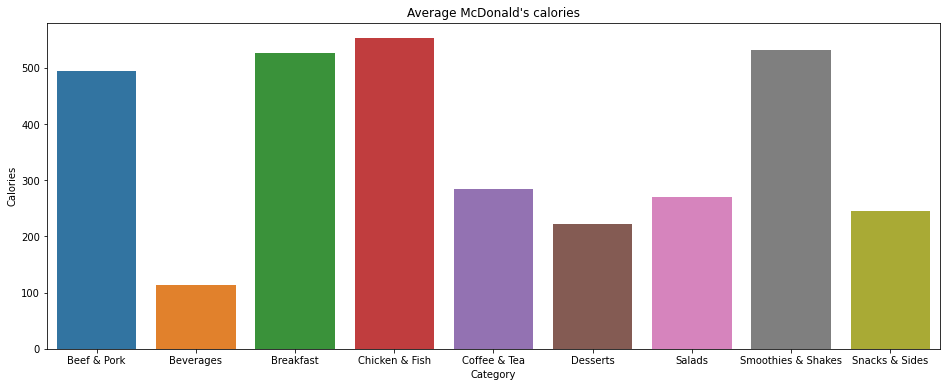

In [19]:
## make it into a bar plot
plt.figure(figsize=(16,6))
plt.title("Average McDonald's calories")
sns.barplot(data= data1, x= 'Category', y= 'Calories');

* Chicken&Fish has the highest average calories

### 2. How much do beverages, like soda or coffee, contribute to the overall caloric intake?

* Generally, the recommended daily calorie intake is 2,000 calories a day for women and 2,500 for men.

In [20]:
male_calories = 2500
female_calories = 2000

In [21]:
df_soda = df[df['Category'] == 'Beverages']

In [22]:
df_soda

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
110,Beverages,Coca-Cola Classic (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,...,39,13,0,0,39,0,0,0,0,0
111,Beverages,Coca-Cola Classic (Medium),21 fl oz cup,200,0,0.0,0,0.0,0,0.0,...,55,18,0,0,55,0,0,0,0,0
112,Beverages,Coca-Cola Classic (Large),30 fl oz cup,280,0,0.0,0,0.0,0,0.0,...,76,25,0,0,76,0,0,0,0,0
113,Beverages,Coca-Cola Classic (Child),12 fl oz cup,100,0,0.0,0,0.0,0,0.0,...,28,9,0,0,28,0,0,0,0,0
114,Beverages,Diet Coke (Small),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
115,Beverages,Diet Coke (Medium),21 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
116,Beverages,Diet Coke (Large),30 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
117,Beverages,Diet Coke (Child),12 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
118,Beverages,Dr Pepper (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,...,37,12,0,0,35,0,0,0,0,0
119,Beverages,Dr Pepper (Medium),21 fl oz cup,190,0,0.0,0,0.0,0,0.0,...,53,18,0,0,51,0,0,0,0,0


In [23]:
df_soda = df_soda.loc[110:129]
df_soda

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
110,Beverages,Coca-Cola Classic (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,...,39,13,0,0,39,0,0,0,0,0
111,Beverages,Coca-Cola Classic (Medium),21 fl oz cup,200,0,0.0,0,0.0,0,0.0,...,55,18,0,0,55,0,0,0,0,0
112,Beverages,Coca-Cola Classic (Large),30 fl oz cup,280,0,0.0,0,0.0,0,0.0,...,76,25,0,0,76,0,0,0,0,0
113,Beverages,Coca-Cola Classic (Child),12 fl oz cup,100,0,0.0,0,0.0,0,0.0,...,28,9,0,0,28,0,0,0,0,0
114,Beverages,Diet Coke (Small),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
115,Beverages,Diet Coke (Medium),21 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
116,Beverages,Diet Coke (Large),30 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
117,Beverages,Diet Coke (Child),12 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
118,Beverages,Dr Pepper (Small),16 fl oz cup,140,0,0.0,0,0.0,0,0.0,...,37,12,0,0,35,0,0,0,0,0
119,Beverages,Dr Pepper (Medium),21 fl oz cup,190,0,0.0,0,0.0,0,0.0,...,53,18,0,0,51,0,0,0,0,0


In [24]:
#calculate the average 
average_soda_calories = df_soda['Calories'].mean()
#calculate the male caloric intake from soda
male_calories_soda = average_soda_calories/male_calories*100
male_calories_soda

4.279999999999999

In [25]:
#calculate the female caloric intake from soda
female_calories_soda = average_soda_calories/female_calories*100
female_calories_soda

5.35

* From the calculation, the average calories intake from soda, for male it is 4.28%, and for female it is 5.35%.

In [26]:
df_coffee = df[df.Item.str.contains('Coffee')]
df_coffee

,Category,Item,Serving Size,Calories,Calories from Fat,Total Fat,Total Fat (% Daily Value),Saturated Fat,Saturated Fat (% Daily Value),Trans Fat,...,Carbohydrates,Carbohydrates (% Daily Value),Dietary Fiber,Dietary Fiber (% Daily Value),Sugars,Protein,Vitamin A (% Daily Value),Vitamin C (% Daily Value),Calcium (% Daily Value),Iron (% Daily Value)
145,Coffee & Tea,Coffee (Small),12 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
146,Coffee & Tea,Coffee (Medium),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
147,Coffee & Tea,Coffee (Large),16 fl oz cup,0,0,0.0,0,0.0,0,0.0,...,0,0,0,0,0,0,0,0,0,0
196,Coffee & Tea,Regular Iced Coffee (Small),16 fl oz cup,140,40,4.5,7,3.0,15,0.0,...,23,8,0,0,22,1,4,0,4,0
197,Coffee & Tea,Regular Iced Coffee (Medium),22 fl oz cup,190,60,7.0,11,4.5,22,0.0,...,31,10,0,0,30,1,4,0,4,0
198,Coffee & Tea,Regular Iced Coffee (Large),32 fl oz cup,270,80,9.0,14,6.0,29,0.0,...,47,16,0,0,45,2,6,0,8,0
199,Coffee & Tea,Caramel Iced Coffee (Small),16 fl oz cup,130,40,4.5,7,3.0,15,0.0,...,22,7,0,0,21,1,4,0,4,0
200,Coffee & Tea,Caramel Iced Coffee (Medium),22 fl oz cup,180,60,7.0,11,4.5,22,0.0,...,29,10,0,0,28,1,4,0,4,0
201,Coffee & Tea,Caramel Iced Coffee (Large),32 fl oz cup,260,80,9.0,14,6.0,29,0.0,...,43,14,0,0,42,2,6,0,6,0
202,Coffee & Tea,Hazelnut Iced Coffee (Small),16 fl oz cup,130,40,4.5,7,3.0,15,0.0,...,21,7,0,0,20,1,4,0,4,0


In [27]:
#calculate the average calories of coffee
average_coffee_calories = df_coffee['Calories'].mean()
average_coffee_calories

145.55555555555554

In [28]:
#Calculate the male caloric intake from coffee
male_calories_coffee = average_coffee_calories /male_calories*100
male_calories_coffee

5.822222222222222

In [29]:
#Calculate the female caloric intake from coffee
female_calories_coffee = average_coffee_calories /female_calories*100
female_calories_coffee

7.277777777777778

* From the calculation, the average calories intake from coffee, for make it is 5.82%, and for female it is 7.27%. Thus, we can conclude that the calories intake from coffee is higher than soda

### 3. Does ordered grilled chicken instead of crispy increase a sandwich's nutritional value?

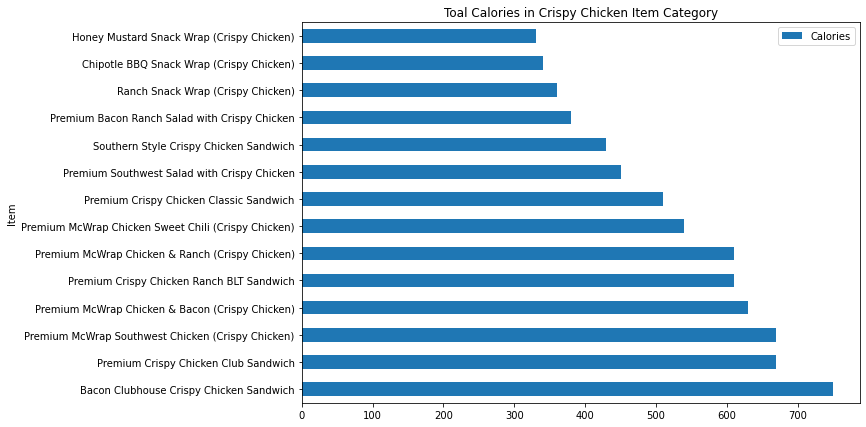

In [59]:
#The amount of calories on Crispy Chicken
crispy = df[df['Item'].str.contains('Crispy Chicken')]
crispy_cal = pd.DataFrame({'Item':crispy.Item,'Calories': crispy.Calories})
crispy_sort = crispy_cal.sort_values('Calories', ascending = False)
ax = crispy_sort.plot.barh(x='Item',y='Calories',figsize=(10,7))
ax.set_title('Toal Calories in Crispy Chicken Item Category');

In [58]:
# Average calories on Crispy Chicken 
avg_crispy_cal = crispy.Calories.mean(axis=0)
avg_crispy_cal

520.0

=>> Average calories on Crispy Chicken is 520.0 Cal.

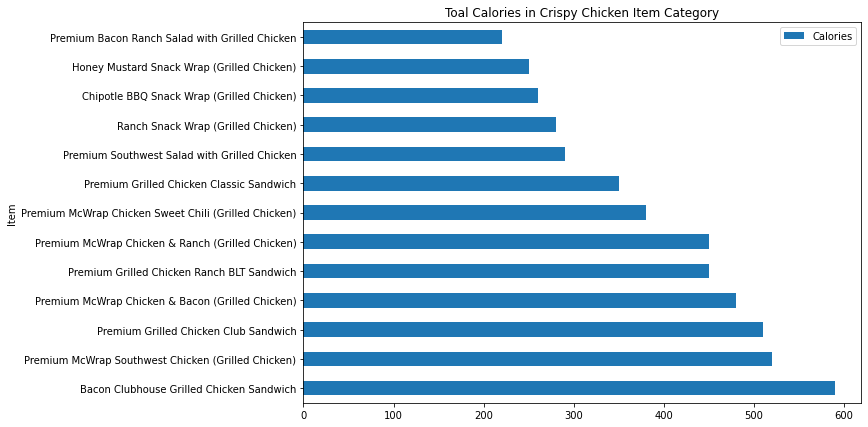

In [60]:
#The amount of calories on Grilled Chicken
grilled = df[df['Item'].str.contains('Grilled Chicken')]
grilled_cal = pd.DataFrame({'Item':grilled.Item,'Calories': grilled.Calories})
grilled_sort = grilled_cal.sort_values('Calories', ascending = False)
ax = grilled_sort.plot.barh(x='Item',y='Calories',figsize=(10,7))
ax.set_title('Toal Calories in Crispy Chicken Item Category');

In [63]:
# Average calories on Crispy Chicken 
avg_grilled_cal = round(grilled.Calories.mean(axis = 0),2)
avg_grilled_cal

386.92

=>>> Average calories on Grilled Chicken is 386.92 Cal.

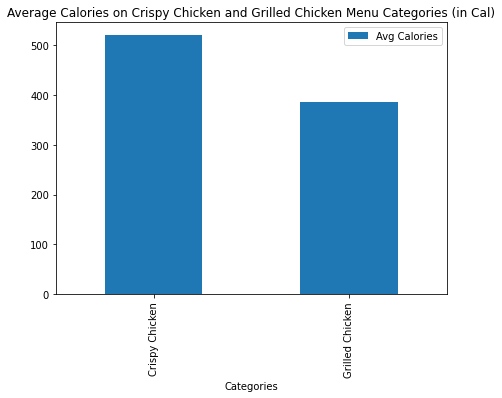

In [70]:
# Create Data Frame containing average calories on Crispy and Grilled
avg_cal = pd.DataFrame({'Categories':['Crispy Chicken', 'Grilled Chicken'],'Avg Calories':[avg_crispy_cal, avg_grilled_cal]})
ax = avg_cal.plot.bar(x='Categories', y = 'Avg Calories',figsize=(7,5))
ax.set_title("Average Calories on Crispy Chicken and Grilled Chicken Menu Categories (in Cal)");

=>> We can conclude that Crispy Chicken category has higher average calories than Grilled Chicken category.

### 4. Analyzie Vitamin & Minerals

In [75]:
df_vitaminA = df.groupby('Category')['Vitamin A (% Daily Value)'].mean()
df_vitaminA.sort_values(ascending = False)

Category
Salads                146.666667
Chicken & Fish         20.444444
Smoothies & Shakes     18.750000
Coffee & Tea           10.736842
Beef & Pork             6.933333
Breakfast               6.928571
Desserts                5.142857
Snacks & Sides          4.846154
Beverages               0.740741
Name: Vitamin A (% Daily Value), dtype: float64

=>>> Of all the food categories, the Salad category has the highest amount of Vitamin A followed by Chicken & Fish, Smoothies & Shakes. 

In [76]:
df_vitaminC =df.groupby('Category')['Vitamin C (% Daily Value)'].mean()
df_vitaminC.sort_values(ascending = False)

Category
Salads                28.333333
Snacks & Sides        28.153846
Beverages             23.481481
Chicken & Fish        12.629630
Breakfast              8.904762
Beef & Pork            7.333333
Smoothies & Shakes     6.964286
Desserts               4.142857
Coffee & Tea           0.000000
Name: Vitamin C (% Daily Value), dtype: float64

=>>  Mcdonald's foods are richer in Vitamin A than in Vitamin C. Salads, Snacks and Sides and Beverages are the food categories with the highest amount of Vitamin C. 

In [77]:
beverage = df[df.Category == 'Beverages']
beverage.groupby('Item')['Vitamin C (% Daily Value)'].mean().sort_values(ascending=False)

Item
Minute Maid Orange Juice (Large)     240.0
Minute Maid Orange Juice (Medium)    160.0
Minute Maid Orange Juice (Small)     130.0
Minute Maid 100% Apple Juice Box     100.0
1% Low Fat Milk Jug                    4.0
Dr Pepper (Child)                      0.0
Sprite (Medium)                        0.0
Sprite (Large)                         0.0
Sprite (Child)                         0.0
Fat Free Chocolate Milk Jug            0.0
Dr Pepper (Small)                      0.0
Dr Pepper (Medium)                     0.0
Dr Pepper (Large)                      0.0
Diet Dr Pepper (Small)                 0.0
Coca-Cola Classic (Child)              0.0
Diet Dr Pepper (Medium)                0.0
Diet Dr Pepper (Large)                 0.0
Diet Dr Pepper (Child)                 0.0
Diet Coke (Small)                      0.0
Diet Coke (Medium)                     0.0
Diet Coke (Large)                      0.0
Diet Coke (Child)                      0.0
Dasani Water Bottle                    0.0
Coca-C

=>> For the beverage category, with the exception of Apple and Orange Juices which are very rich in Vitamin C, all the other beverages & drinks (e.g. Coke, Sprite) are very low in Vitamins

In [79]:
iron = df.groupby('Category')['Iron (% Daily Value)'].mean()
calcium = df.groupby('Category')['Calcium (% Daily Value)'].mean()

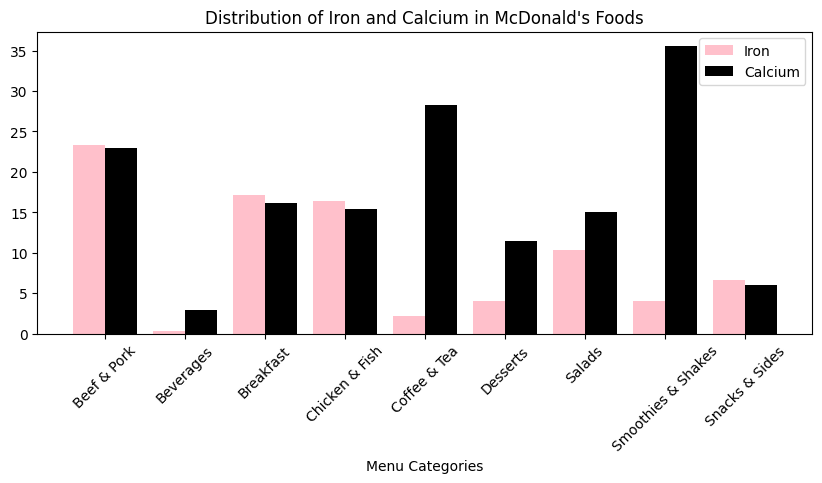

In [81]:
plt.figure(figsize=(10, 4), dpi=100)

category = iron.index
Iron = iron.values
Calcium = calcium.values

X_axis = np.arange(len(category))
plt.bar(X_axis - 0.2, Iron, 0.4, label = 'Iron', color = 'pink')
plt.bar(X_axis + 0.2, Calcium, 0.4, label = 'Calcium', color = 'black')

plt.xticks(X_axis, category)
plt.xlabel("Menu Categories")
plt.title("Distribution of Iron and Calcium in McDonald's Foods")
plt.xticks(rotation=45)
plt.legend()
plt.show();

* Shakes (fruit shakes, milk shakes etc.), coffee and tea are rich in calcium but low in iron 
*  Menu categories rich in Animal protein (Beef & Pork, Chicken & Fish) are rich in both Iron and Calcium Mcdonald's
* Beverages are very low in Calcium and Iron.